In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression,HuberRegressor,TheilSenRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error,r2_score
from sklearn.metrics import root_mean_squared_error as RMSE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats


In [4]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
subm = pd.read_csv('sample_submission.csv')
df.head()


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,0.5500,0.4125,0.1625,1.715145,0.609514,0.396893,0.566990,4.0
1,1,F,1.5125,1.2125,0.4000,31.312023,13.395139,6.265239,8.930093,10.0
2,2,F,1.5125,1.1750,0.4125,31.552993,14.670866,6.279414,9.922325,11.0
3,3,I,0.8000,0.6000,0.2000,4.620969,3.019222,0.978058,1.417475,7.0
4,4,I,1.3875,1.0875,0.3625,24.323871,11.651644,5.712424,5.386405,8.0


In [5]:
cols = ['Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight']
X = df[cols]
y = df['Age']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mean_absolute_error(y_test,y_pred)

1.4186277270707812

# Cleaning X and test data


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          15000 non-null  float64
 1   Diameter        15000 non-null  float64
 2   Height          15000 non-null  float64
 3   Weight          15000 non-null  float64
 4   Shucked Weight  15000 non-null  float64
 5   Viscera Weight  15000 non-null  float64
 6   Shell Weight    15000 non-null  float64
dtypes: float64(7)
memory usage: 820.4 KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   Sex             10000 non-null  object 
 2   Length          10000 non-null  float64
 3   Diameter        10000 non-null  float64
 4   Height          10000 non-null  float64
 5   Weight          10000 non-null  float64
 6   Shucked Weight  10000 non-null  float64
 7   Viscera Weight  10000 non-null  float64
 8   Shell Weight    10000 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 703.2+ KB


# Feature enginering

In [9]:
df = pd.get_dummies(df,columns=['Sex'],dtype=int)
df = df.reset_index(drop=True)

test = pd.get_dummies(test,columns=['Sex'],dtype=int)
test = test.reset_index(drop=True)

## finding outliers

In [10]:
def plot_boxplot_and_hist(data, variable):
    fig, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()

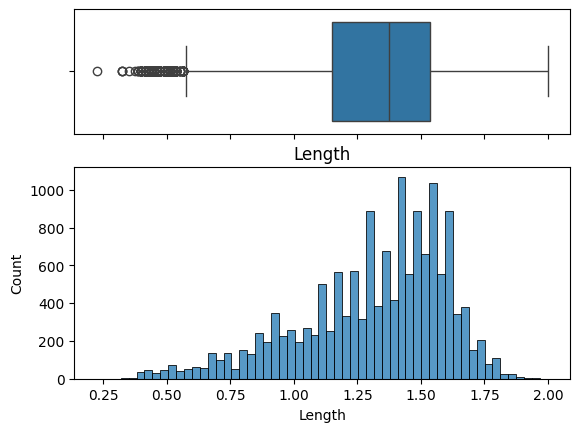

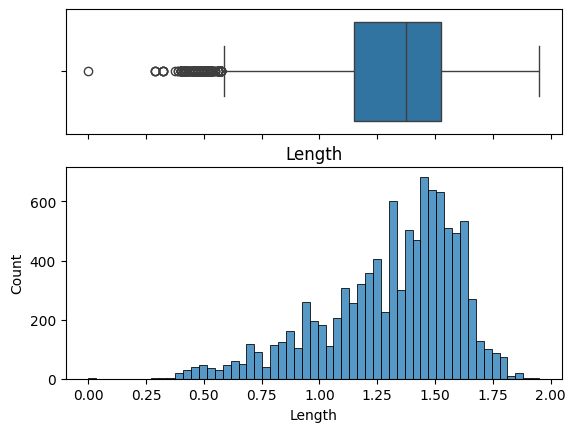

In [11]:
plot_boxplot_and_hist(X,'Length')
plot_boxplot_and_hist(test,'Length')


In [12]:
# mean plus 3 * std

def find_limits(df, variable, fold):
    lower_limit = df[variable].mean() - fold * df[variable].std()
    upper_limit = df[variable].mean() + fold * df[variable].std()
    return lower_limit, upper_limit

In [13]:
# X['Length]

X_lower_limit, X_upper_limit = find_limits(X, "Length", 3)
X_lower_limit, X_upper_limit

X_outliers = np.where(
    (X["Length"] > X_upper_limit) | 
    (X["Length"] < X_lower_limit),
    True,
    False,
)

X_outliers.sum()


X_mode_length = X['Length'].mode()
X['Length'] = np.where((X['Length'] > X_upper_limit) | (X['Length'] < X_lower_limit), X_mode_length,X['Length'])

In [14]:
# test["Length"]

test_lower_limit, test_upper_limit = find_limits(test, "Length", 3)
test_lower_limit, test_upper_limit

test_outliers = np.where(
    (test["Length"] > test_upper_limit) | 
    (test["Length"] < test_lower_limit),
    True,
    False,
)

test_outliers.sum()

test_mode_length = test['Length'].mode()
test['Length'] = np.where((test['Length'] > test_upper_limit) | (test['Length'] < test_lower_limit), test_mode_length,test['Length'])

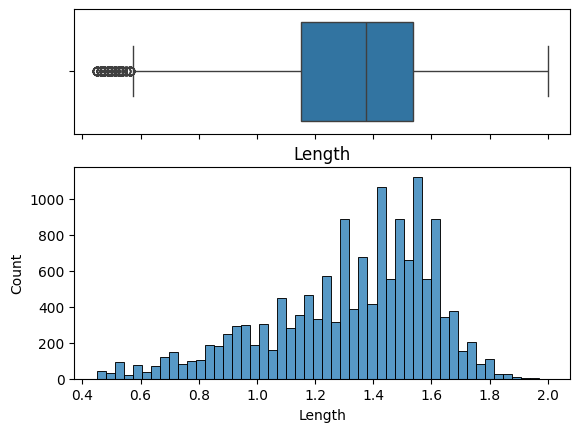

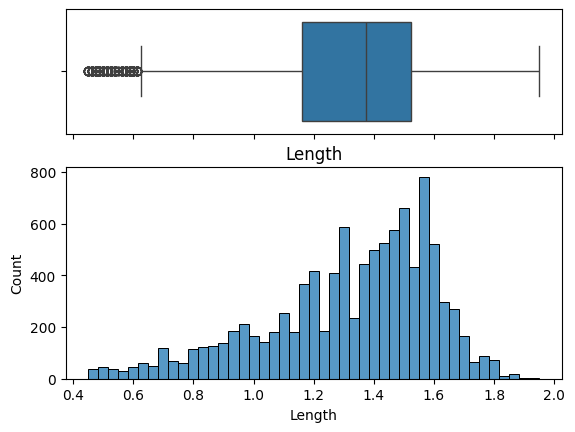

In [15]:
plot_boxplot_and_hist(X,'Length')
plot_boxplot_and_hist(test,'Length')

### Diameter column

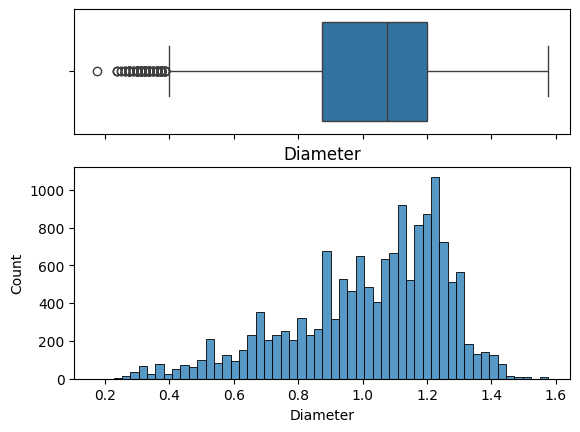

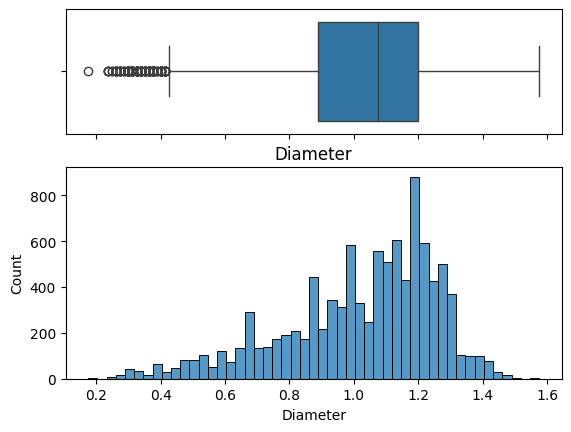

In [16]:
plot_boxplot_and_hist(X,'Diameter')
plot_boxplot_and_hist(test,'Diameter')

In [17]:
# X['Diameter']

X_lower_limit, X_upper_limit = find_limits(X, "Diameter", 3)
X_lower_limit, X_upper_limit

X_outliers = np.where(
    (X["Diameter"] > X_upper_limit) | 
    (X["Diameter"] < X_lower_limit),
    True,
    False,
)

X_outliers.sum()


X_mode_Diameter = X['Diameter'].mode()
X['Diameter'] = np.where((X['Diameter'] > X_upper_limit) | (X['Diameter'] < X_lower_limit), X_mode_Diameter,X['Diameter'])

In [18]:
# test["Diameter"]

test_lower_limit, test_upper_limit = find_limits(test, "Diameter", 3)
test_lower_limit, test_upper_limit

test_outliers = np.where(
    (test["Diameter"] > test_upper_limit) | 
    (test["Diameter"] < test_lower_limit),
    True,
    False,
)

test_outliers.sum()

test_mode_Diameter = test['Diameter'].mode()
test['Diameter'] = np.where((test['Diameter'] > test_upper_limit) | (test['Diameter'] < test_lower_limit), test_mode_Diameter,test['Diameter'])

### Height column

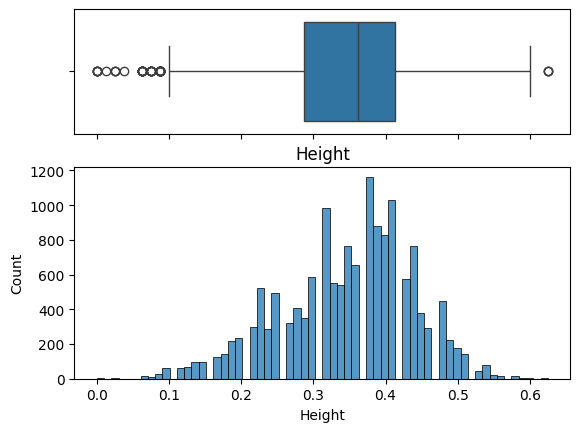

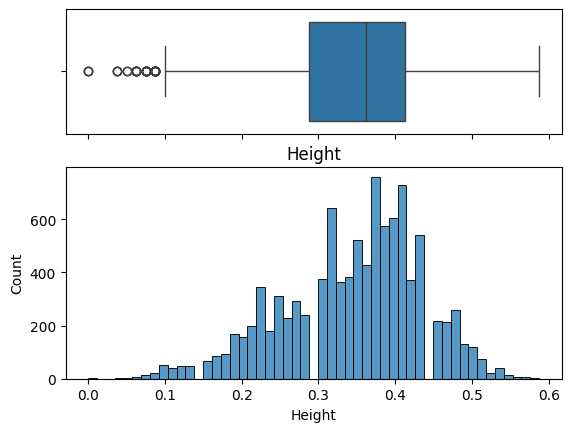

In [19]:
plot_boxplot_and_hist(X,'Height')
plot_boxplot_and_hist(test,'Height')

In [20]:
# X['Height']

X_lower_limit, X_upper_limit = find_limits(X, "Height", 3)
X_lower_limit, X_upper_limit

X_outliers = np.where(
    (X["Height"] > X_upper_limit) | 
    (X["Height"] < X_lower_limit),
    True,
    False,
)

X_outliers.sum()


X_mode_Height = X['Height'].mode()
X['Height'] = np.where((X['Height'] > X_upper_limit) | (X['Height'] < X_lower_limit), X_mode_Height,X['Height'])





In [21]:
# test["Height"]

test_lower_limit, test_upper_limit = find_limits(test, "Height", 3)
test_lower_limit, test_upper_limit

test_outliers = np.where(
    (test["Height"] > test_upper_limit) | 
    (test["Height"] < test_lower_limit),
    True,
    False,
)

test_outliers.sum()

test_mode_Height = test['Height'].mode()
test['Height'] = np.where((test['Height'] > test_upper_limit) | (test['Height'] < test_lower_limit), test_mode_Height,test['Height'])

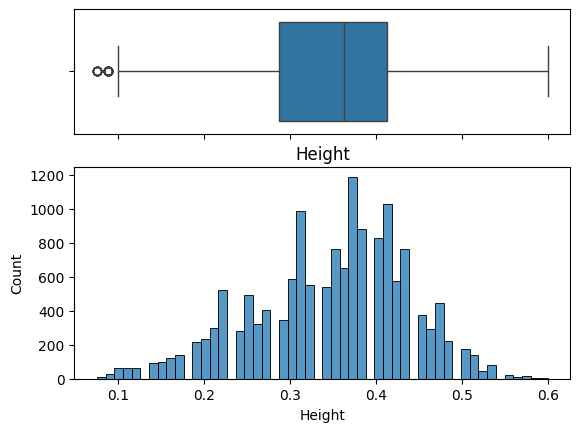

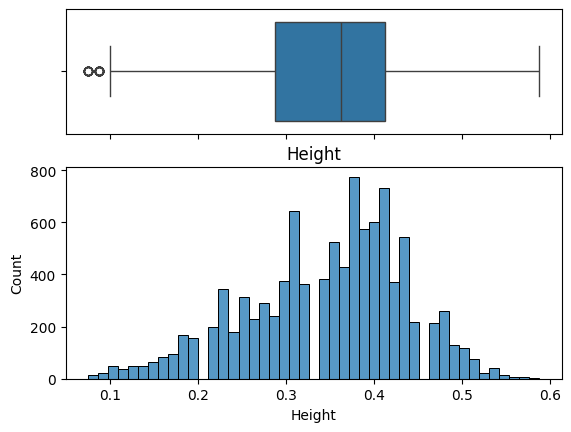

In [22]:
plot_boxplot_and_hist(X,'Height')
plot_boxplot_and_hist(test,'Height')

### Weight

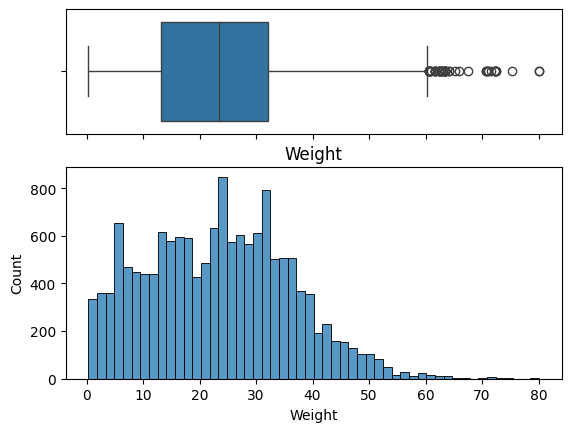

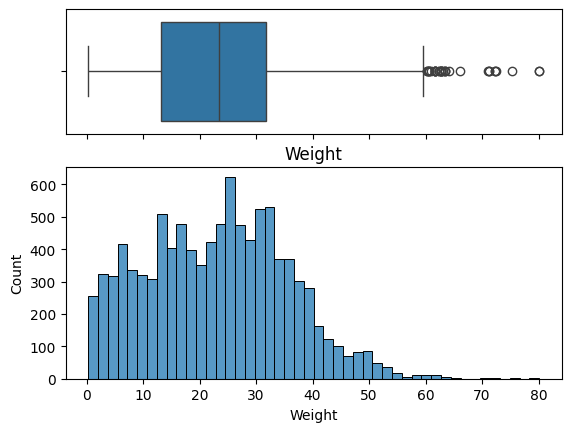

In [23]:
plot_boxplot_and_hist(X,'Weight')
plot_boxplot_and_hist(test,'Weight')

In [24]:
# X['Weight']

X_lower_limit, X_upper_limit = find_limits(X, "Weight", 3)
X_lower_limit, X_upper_limit

X_outliers = np.where(
    (X["Weight"] > X_upper_limit) | 
    (X["Weight"] < X_lower_limit),
    True,
    False,
)

X_outliers.sum()


X_mode_Weight = X['Weight'].mode()
X['Weight'] = np.where((X['Weight'] > X_upper_limit) | (X['Weight'] < X_lower_limit), X_mode_Weight,X['Weight'])


# test["Weight"]

test_lower_limit, test_upper_limit = find_limits(test, "Weight", 3)
test_lower_limit, test_upper_limit

test_outliers = np.where(
    (test["Weight"] > test_upper_limit) | 
    (test["Weight"] < test_lower_limit),
    True,
    False,
)

test_outliers.sum()

test_mode_Weight = test['Weight'].mode()
test['Weight'] = np.where((test['Weight'] > test_upper_limit) | (test['Weight'] < test_lower_limit), test_mode_Weight,test['Weight'])


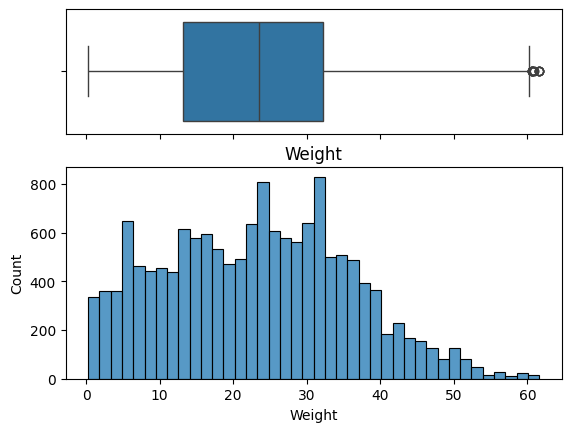

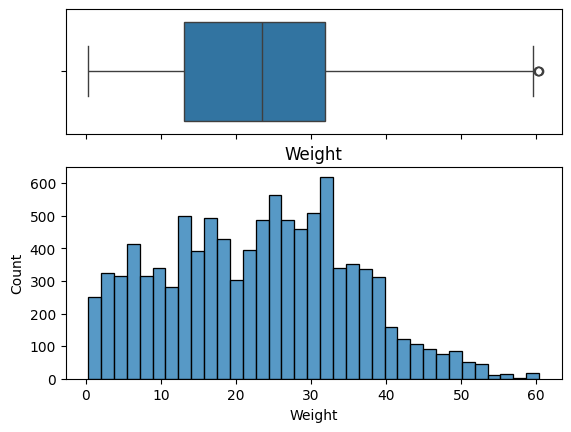

In [25]:
plot_boxplot_and_hist(X,'Weight')
plot_boxplot_and_hist(test,'Weight')

### Shucked Weight

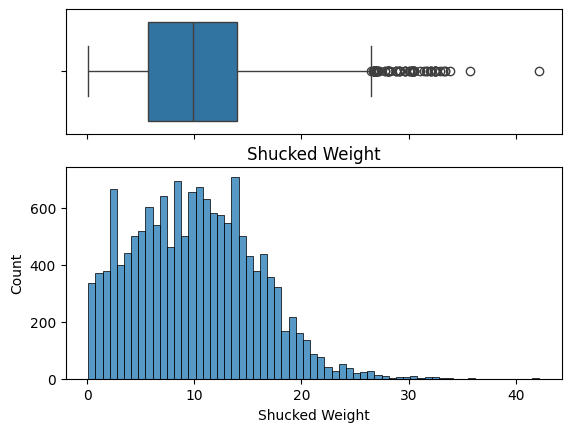

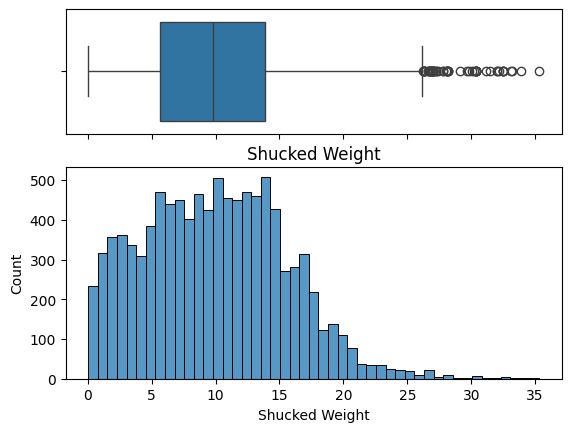

In [26]:
plot_boxplot_and_hist(X,'Shucked Weight')
plot_boxplot_and_hist(test,'Shucked Weight')

In [27]:
# X['Shucked Weight']

X_lower_limit, X_upper_limit = find_limits(X, "Shucked Weight", 3)
X_lower_limit, X_upper_limit

X_outliers = np.where(
    (X["Shucked Weight"] > X_upper_limit) | 
    (X["Shucked Weight"] < X_lower_limit),
    True,
    False,
)

X_outliers.sum()


X_mode_Shucked_Weight = X['Shucked Weight'].mode()
X['Shucked Weight'] = np.where((X['Shucked Weight'] > X_upper_limit) | (X['Shucked Weight'] < X_lower_limit), X_mode_Shucked_Weight,X['Shucked Weight'])


# test["Shucked Weight"]

test_lower_limit, test_upper_limit = find_limits(test, "Shucked Weight", 3)
test_lower_limit, test_upper_limit

test_outliers = np.where(
    (test["Shucked Weight"] > test_upper_limit) | 
    (test["Shucked Weight"] < test_lower_limit),
    True,
    False,
)

test_outliers.sum()

test_mode_Shucked_Weight = test['Shucked Weight'].mode()
test['Shucked Weight'] = np.where((test['Shucked Weight'] > test_upper_limit) | (test['Shucked Weight'] < test_lower_limit), test_mode_Shucked_Weight,test['Shucked Weight'])


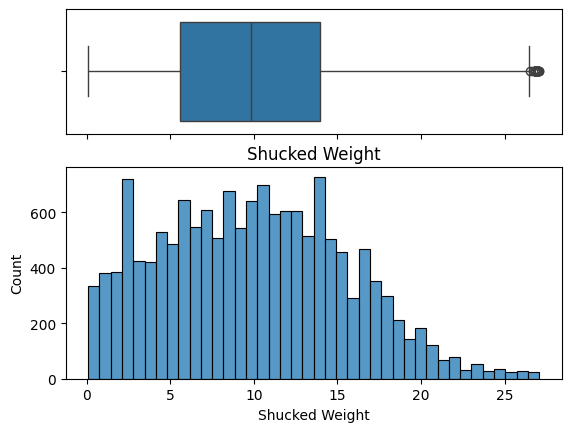

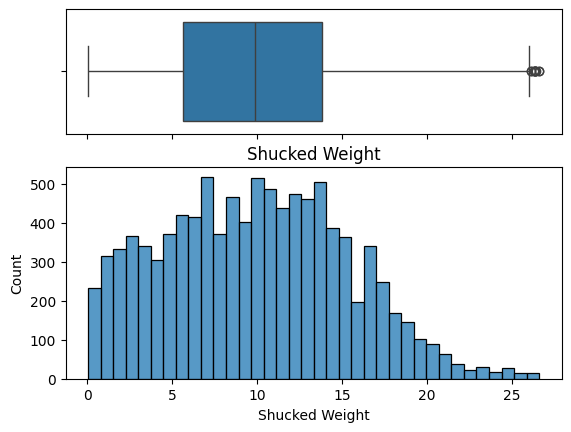

In [28]:
plot_boxplot_and_hist(X,'Shucked Weight')
plot_boxplot_and_hist(test,'Shucked Weight')

### Viscera Weight

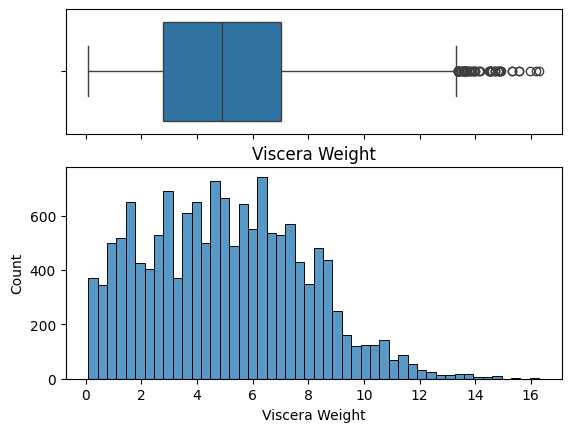

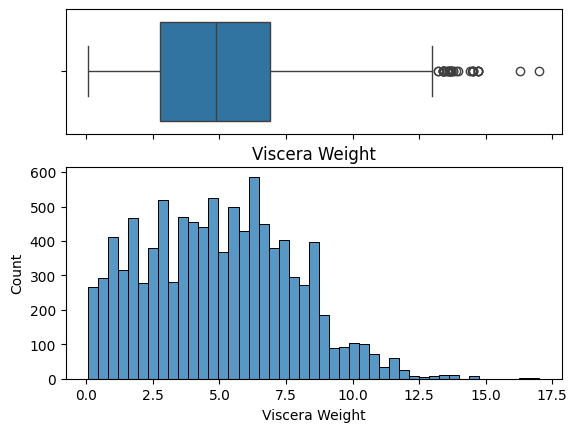

In [29]:
plot_boxplot_and_hist(X,'Viscera Weight')
plot_boxplot_and_hist(test,'Viscera Weight')

In [30]:
# X['Viscera Weight']

X_lower_limit, X_upper_limit = find_limits(X, "Viscera Weight", 3)
X_lower_limit, X_upper_limit

X_outliers = np.where(
    (X["Viscera Weight"] > X_upper_limit) | 
    (X["Viscera Weight"] < X_lower_limit),
    True,
    False,
)

X_outliers.sum()


X_mode_Shucked_Weight = X['Viscera Weight'].mode()
X['Viscera Weight'] = np.where((X['Viscera Weight'] > X_upper_limit) | (X['Viscera Weight'] < X_lower_limit), X_mode_Shucked_Weight,X['Viscera Weight'])


# test["Viscera Weight"]

test_lower_limit, test_upper_limit = find_limits(test, "Viscera Weight", 3)
test_lower_limit, test_upper_limit

test_outliers = np.where(
    (test["Viscera Weight"] > test_upper_limit) | 
    (test["Viscera Weight"] < test_lower_limit),
    True,
    False,
)

test_outliers.sum()

test_mode_Shucked_Weight = test['Viscera Weight'].mode()
test['Viscera Weight'] = np.where((test['Viscera Weight'] > test_upper_limit) | (test['Viscera Weight'] < test_lower_limit), test_mode_Shucked_Weight,test['Viscera Weight'])


### Shell Weight

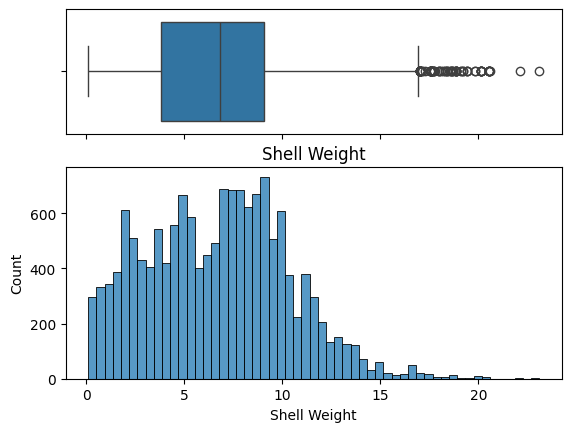

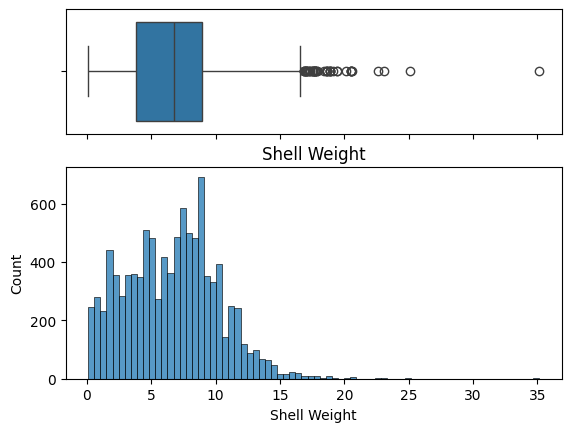

In [31]:
plot_boxplot_and_hist(X,'Shell Weight')
plot_boxplot_and_hist(test,'Shell Weight')

In [32]:
# X['Shell Weight']

X_lower_limit, X_upper_limit = find_limits(X, "Shell Weight", 3)
X_lower_limit, X_upper_limit

X_outliers = np.where(
    (X["Shell Weight"] > X_upper_limit) | 
    (X["Shell Weight"] < X_lower_limit),
    True,
    False,
)

X_outliers.sum()


X_mode_Shucked_Weight = X['Shell Weight'].mode()
X['Shell Weight'] = np.where((X['Shell Weight'] > X_upper_limit) | (X['Shell Weight'] < X_lower_limit), X_mode_Shucked_Weight,X['Shell Weight'])


# test["Shell Weight"]

test_lower_limit, test_upper_limit = find_limits(test, "Shell Weight", 3)
test_lower_limit, test_upper_limit

test_outliers = np.where(
    (test["Shell Weight"] > test_upper_limit) | 
    (test["Shell Weight"] < test_lower_limit),
    True,
    False,
)

test_outliers.sum()

test_mode_Shucked_Weight = test['Shell Weight'].mode()
test['Shell Weight'] = np.where((test['Shell Weight'] > test_upper_limit) | (test['Shell Weight'] < test_lower_limit), test_mode_Shucked_Weight,test['Shell Weight'])


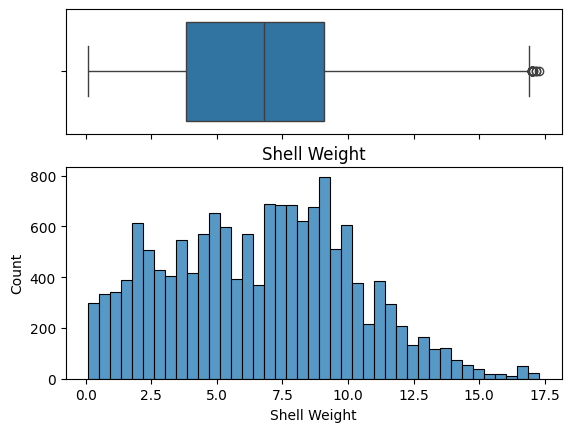

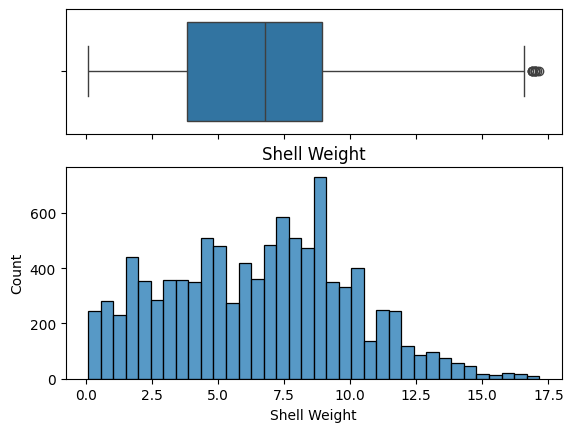

In [33]:
plot_boxplot_and_hist(X,'Shell Weight')
plot_boxplot_and_hist(test,'Shell Weight')

In [34]:
test.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,15000,0.8625,0.6500,0.2250,5.854172,2.721552,1.048931,1.743494,0,1,0
1,15001,1.2875,1.0000,0.3250,20.326591,9.412034,4.578444,5.244657,1,0,0
2,15002,0.7000,0.5250,0.1500,2.820775,1.091456,0.666213,0.850485,0,1,0
3,15003,1.2625,0.9625,0.3375,18.710670,9.908150,4.521745,4.677668,1,0,0
4,15004,0.9125,0.6625,0.2250,5.060386,2.197086,1.176504,1.700970,0,1,0


In [35]:
cols = ['Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight','Sex_F','Sex_I','Sex_M']
X = df[cols]
y = df['Age']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [36]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

mean_absolute_error(y_test,y_pred)

1.4003375437132148

In [37]:
hug_reg = HuberRegressor()
hug_reg.fit(X,y)
y_pred = hug_reg.predict(X_test)



print("RMSE : ",RMSE(y_test,y_pred))
print("MEA",mean_absolute_error(y_test,y_pred))
print("MedAE",median_absolute_error(y_test,y_pred))

RMSE :  2.102385132903988
MEA 1.36664115616025
MedAE 0.9074693761501127


/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [38]:
hug_reg = HuberRegressor()
hug_reg.fit(X,y)
y_pred = hug_reg.predict(test[cols])

/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [39]:
#from sklearn.ensemble import StackingRegressor
#from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor, RANSACRegressor
#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, mean_absolute_percentage_error
#from sklearn.datasets import make_regression
#
#cols = ['Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight','Sex_F','Sex_I','Sex_M']
#X = df[cols]
#y = df['Age']
#
## Define base models as pipelines
#linear_pipeline = Pipeline([('model', LinearRegression())])
#ridge_pipeline = Pipeline([('model', Ridge(alpha=1.0))])
#lasso_pipeline = Pipeline([('model', Lasso(alpha=0.1))])
#huber_pipeline = Pipeline([('model', HuberRegressor())])
#ransac_pipeline = Pipeline([('model', RANSACRegressor())])
#
## Define the meta-model
#meta_model = LinearRegression()
#
## Create the stacking regressor with passthrough
#stacking_regressor = StackingRegressor(
#    estimators=[
#        ('linear', linear_pipeline),
#        ('ridge', ridge_pipeline),
#        ('lasso', lasso_pipeline),
#        ('huber', huber_pipeline),
#        ('ransac', ransac_pipeline)
#    ],
#    final_estimator=meta_model,
#    cv=5,
#    passthrough=True  # Include original features in the meta-model
#)
#
## Train the stacking model
#stacking_regressor.fit(X, y)


In [40]:
# Ridge Regression with GridSearchCV
ridge = Ridge()

# Hyperparameters to tune
ridge_params = {
    'alpha': [0.1, 1.0, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}

# GridSearchCV
ridge_grid = GridSearchCV(ridge, 
                          ridge_params, 
                          cv=5, 
                          scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)


/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:34

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10, 100],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             scoring='neg_mean_squared_error')

In [41]:
ridge_grid.best_estimator_

Ridge(alpha=0.1, solver='sparse_cg')

In [42]:
lasso = Lasso()

# Hyperparameters to tune
lasso_params = {
    'alpha': np.linspace(-4, 0, 1000),
    'max_iter': [1000, 5000, 10000]
}

# RandomizedSearchCV
lasso_random = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_random.fit(X_train, y_train)

# Best parameters and performance
print("Best parameters for Lasso:", lasso_random.best_params_)
print("Best cross-validation RMSE for Lasso:", np.sqrt(-lasso_random.best_score_))

# Prediction and evaluation
lasso_best = lasso_random.best_estimator_
y_pred_lasso = lasso_best.predict(X_test)
print("Test RMSE for Lasso:", mean_squared_error(y_test, y_pred_lasso, squared=False))


/home/nigora/.local/lib/python3.10/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.846e+04, tolerance: 9.164e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

Best parameters for Lasso: {'alpha': 0.0, 'max_iter': 5000}
Best cross-validation RMSE for Lasso: 2.027085744027646
Test RMSE for Lasso: 2.065612701087073


/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.303e+04, tolerance: 1.154e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/nigora/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
lasso_random.best_estimator_

Lasso(alpha=0.0, max_iter=5000)

In [44]:
model = HuberRegressor()

In [45]:
param_grid = {
    'epsilon': [1.1, 1.2, 1.3, 1.35, 1.4],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1]
}


In [46]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_params_

/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/nigora/.local/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

{'alpha': 0.1, 'epsilon': 1.4}

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


In [48]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),   # Generate polynomial features
    ('scaler', StandardScaler()),      # Standardize features
    ('linear', LinearRegression())     # Linear Regression
])


In [49]:
param_grid = {
    'poly__degree': [1, 2, 3],              # Degree of polynomial features
    'poly__include_bias': [True, False],    # Include bias term or not
    'linear__fit_intercept': [True, False]  # Fit intercept or not
}


In [50]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('linear', LinearRegression())]),
             n_jobs=-1,
             param_grid={'linear__fit_intercept': [True, False],
                         'poly__degree': [1, 2, 3],
                         'poly__include_bias': [True, False]},
             scoring='neg_mean_squared_error')

In [51]:
grid_search.best_params_

{'linear__fit_intercept': True, 'poly__degree': 3, 'poly__include_bias': True}

In [52]:
theil_model = TheilSenRegressor()

In [53]:
param_grid = {
    'max_subpopulation': [1000, 10000, 100000],
    'n_subsamples': [None, 50, 100],
    'max_iter': [300, 500, 1000],
    'tol': [1e-3, 1e-4, 1e-5]
}


In [56]:
grid_search = GridSearchCV(theil_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


/home/nigora/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
